CODE BLOCK: 1

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from utils import return_dataset_images
from model import Net, model_summary, model_train, model_test, draw_chart

CODE BLOCK: 2

In [5]:
# CUDA?
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cpu')

CODE BLOCK: 3

In [6]:
#mostly data preparation part
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1), # from center cropping 22 pixels
    transforms.Resize((28, 28)), # resizing image to 28*28
    transforms.RandomRotation((-15., 15.), fill=0), # rotation to cover all angles.
    transforms.ToTensor(), # convert to a tensor and also do standardization.
    transforms.Normalize((0.1307,), (0.3081,)), # mean and SD of entire dataset
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [7]:
#mostly data preparation part
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [8]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

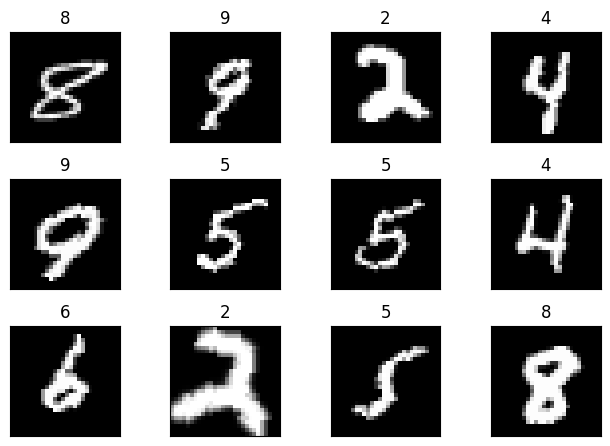

In [9]:
# this method is imported from utils module
return_dataset_images(train_loader, 12)

CODE BLOCK: 9

In [10]:
model = Net().to(device)
model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [14]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 1

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train(model, device, train_loader, optimizer, criterion)
  model_test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 1


Train: Loss=0.3291 Batch_id=117 Accuracy=84.24: 100%|██████████| 118/118 [06:39<00:00,  3.39s/it]


Test set: Average loss: 0.3229, Accuracy: 9069/10000 (90.69%)

Adjusting learning rate of group 0 to 1.0000e-03.


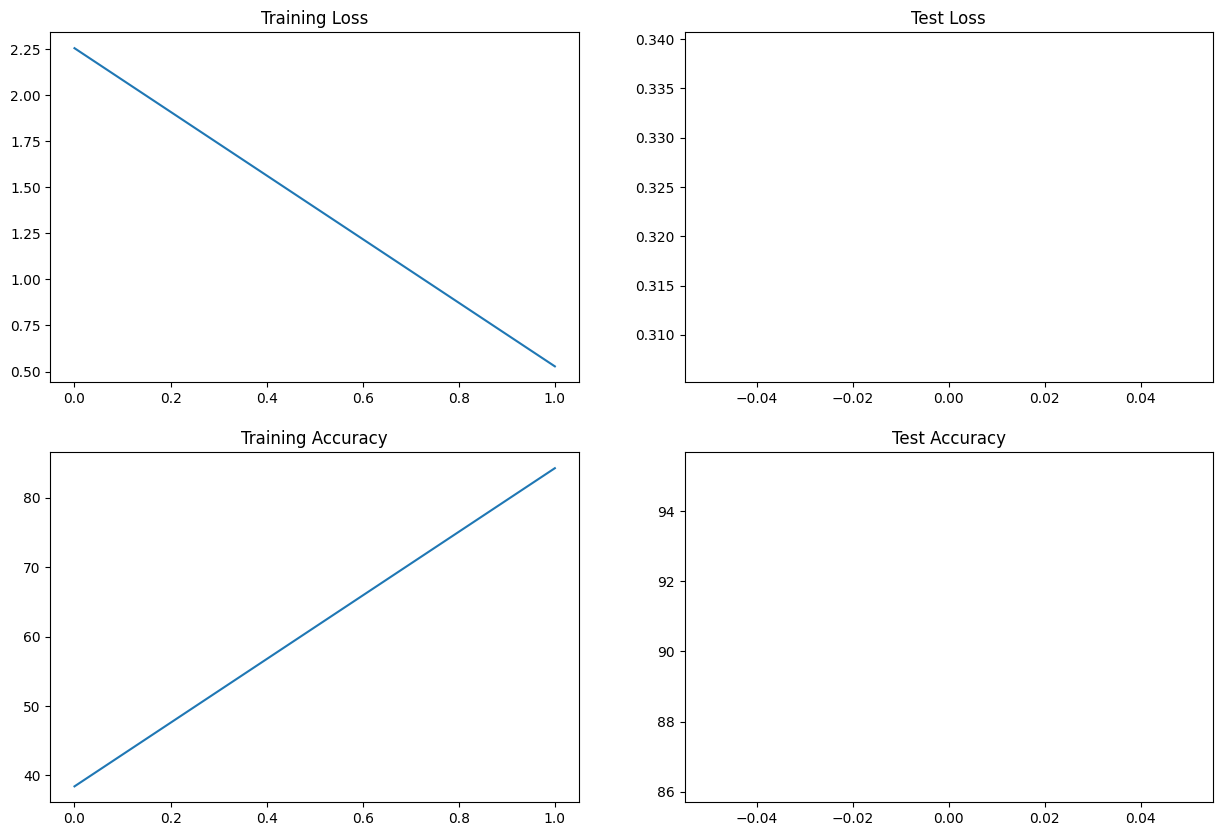

In [15]:
draw_chart()